# Project

## 1. Definition

The main goal of this project will be to explore optimal ways of analysing microscopic structures using image processing to count the total number of nanoparticles in a given image. In research labs within UFABC, this process is usually done manually. The method we will use consists of defining a pipeline such as grayscaling, removing noise, segmenting the particles and labeling capable of counting the nanoparticles.

## 2. Data

I will be using images of microscopic structures provided by UFABC's department of nanotechnology. The images used can be found on this link: http://bit.ly/2Qsdrb4.

## 3. Processing

### 3.1 Method
The nanoparticles contained within the microscopic images can generally be seen as white dots.

In [1]:
import matplotlib.pyplot as plt
example = plt.imread('data/cucumber/Imagem_030.tif')
plt.figure(figsize=(8,8))
plt.title('Microscopic image with nanoparticles')
plt.imshow(example, 'gray')

To reach our objective, that is count the nanoparticles, the pipeline below was defined.
* **Gaussian blur filter**: pre-processing to normalize images
* **Top-Hat transform**: highlight bright features
* **Limiarization**: create a binary image with highlighted nanoparticles
* **Label**: label particles
* **Count**: count unique labels to get the total

### 3.2 Main

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def count_particles(sample, blurKernelLength, tophatKernelLength, thresh):
    blurKernel = (blurKernelLength, blurKernelLength)
    blur = cv2.blur(sample, blurKernel)
    tophatKernel = (tophatKernelLength, tophatKernelLength)
    tophat = cv2.morphologyEx(blur, cv2.MORPH_TOPHAT, tophatKernel)
    binary = cv2.threshold(tophat, thresh, 255, cv2.THRESH_BINARY)[1]
    labels = cv2.connectedComponents(binary)[1]
    total = len(np.unique(labels)) - 1
    plt.figure(figsize=(20, 20))
    plt.title('Original | Blur | Threshed Top Hat')
    plt.imshow(np.hstack([sample, blur, binary]), 'gray')
    return total

## 3. Results

In the final process we ran the solution for a group of images (apple, banana, cucumber, dragonfruit, elderberry, fig, guava) detailed below.

### 3.2 Apple

Counted particles in original: 1122
Counted particles in zoom: 192
Counted particles in zoom 2: 109


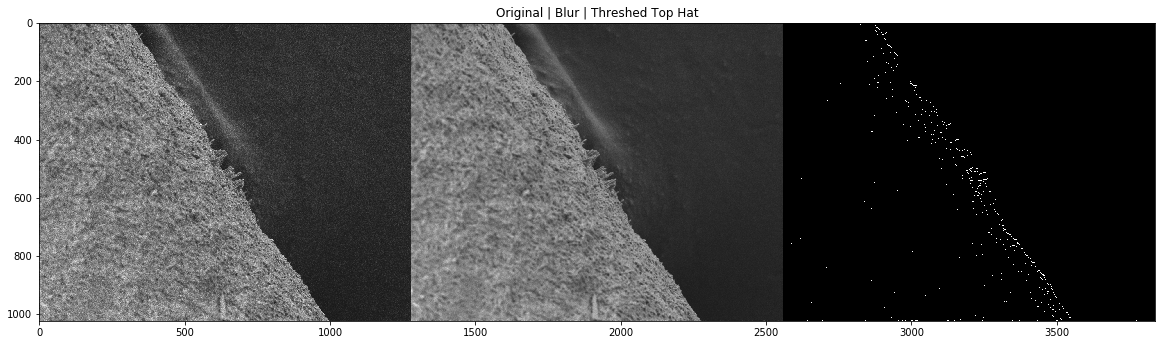

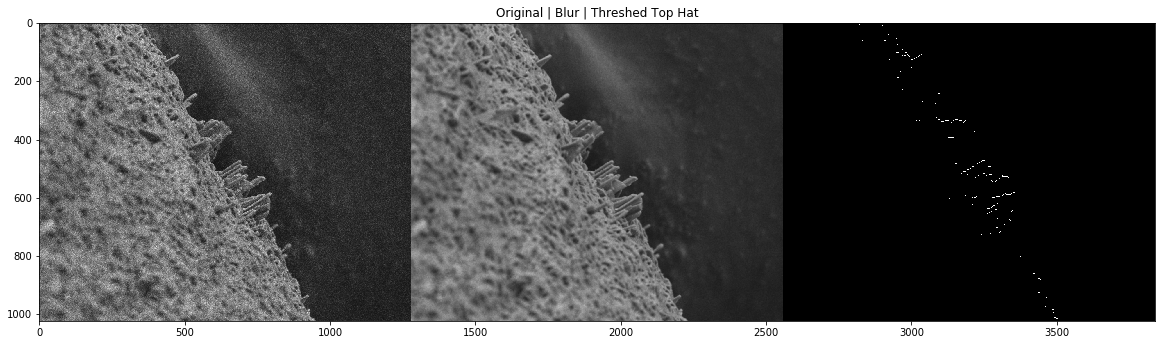

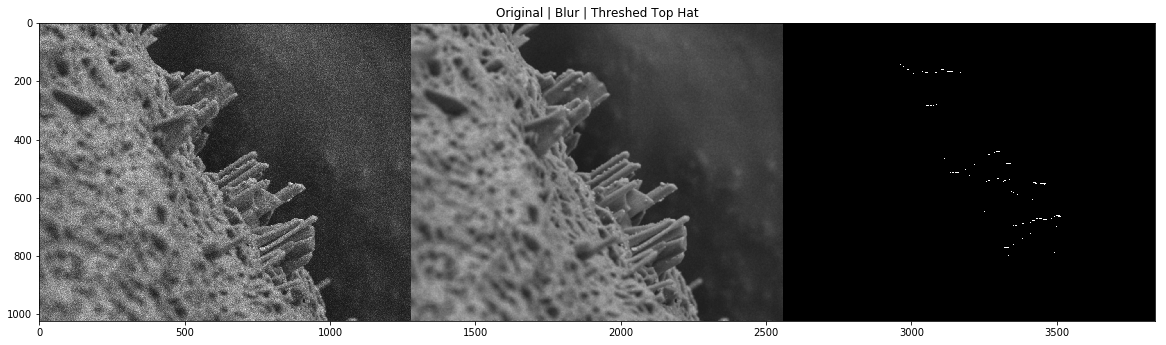

In [3]:
original = cv2.imread('data/apple/Imagem_013.tif', 0)
zoomed = cv2.imread('data/apple/Imagem_012.tif', 0)
doublezoomed = cv2.imread('data/apple/Imagem_011.tif', 0)
print('Counted particles in original:', count_particles(original, blurKernelLength = 3, tophatKernelLength = 7, thresh = 20))
print('Counted particles in zoom:', count_particles(zoomed, blurKernelLength = 4, tophatKernelLength = 7, thresh = 20))
print('Counted particles in zoom 2:', count_particles(doublezoomed, blurKernelLength = 5, tophatKernelLength = 7, thresh = 20))

### 3.2 Banana

Counted particles in original: 827
Counted particles in zoom: 57
Counted particles in zoom 2: 12
Counted particles in alternative zoom: 707


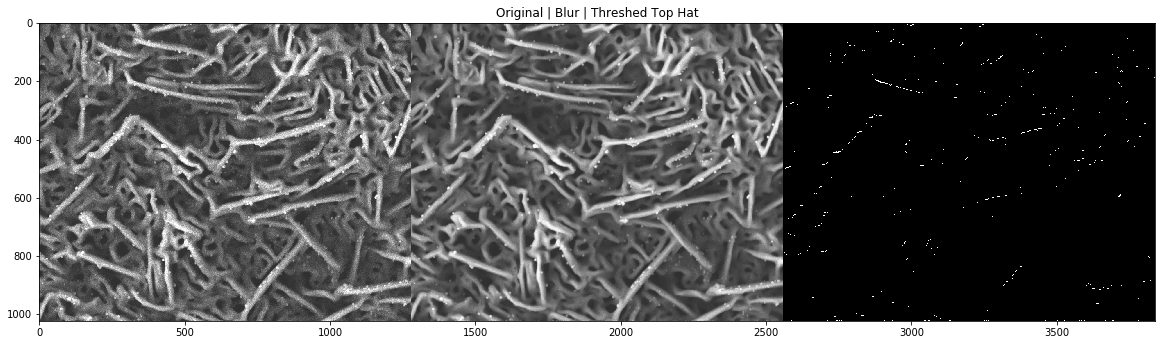

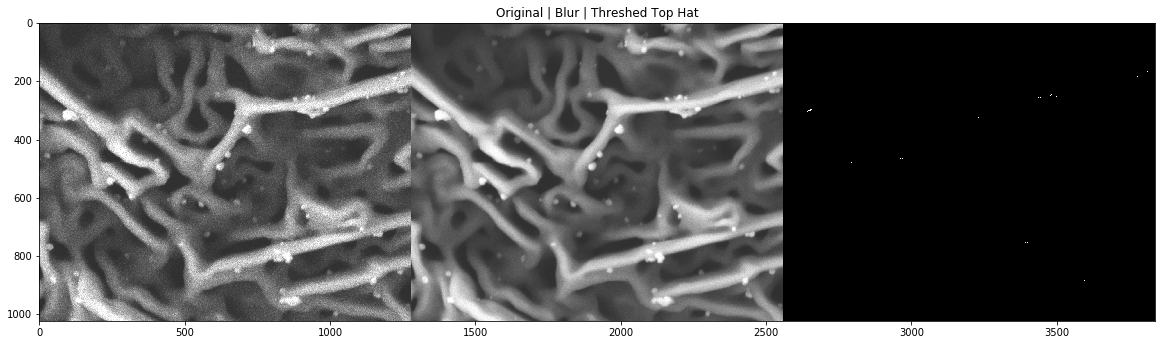

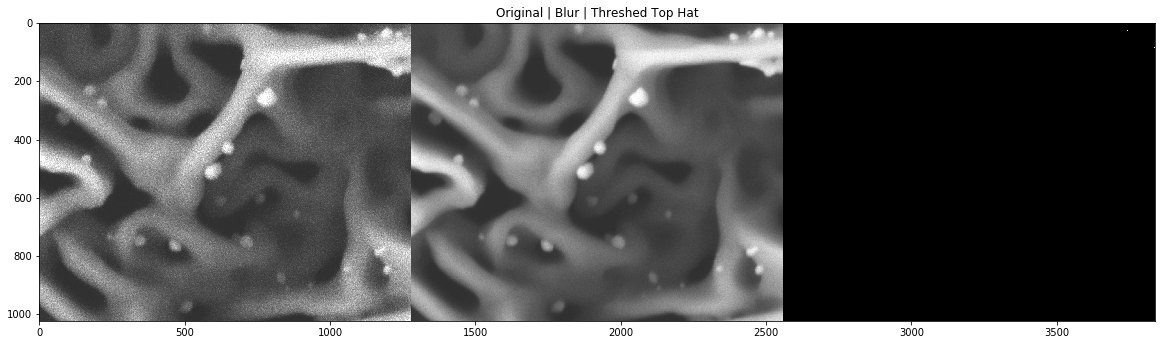

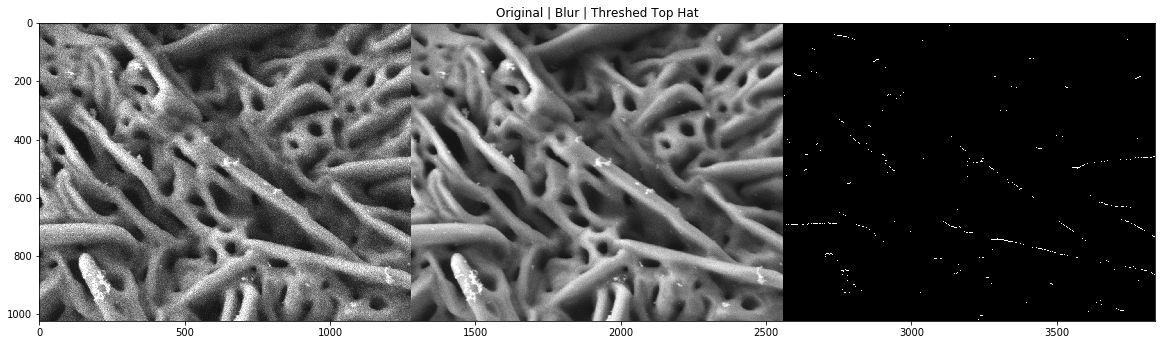

In [4]:
original = cv2.imread('data/banana/Imagem_006.tif', 0)
zoomed = cv2.imread('data/banana/Imagem_005.tif', 0)
zoomedalt = cv2.imread('data/banana/Imagem_009.tif', 0)
doublezoomed = cv2.imread('data/banana/Imagem_004.tif', 0)
print('Counted particles in original:', count_particles(original, blurKernelLength = 3, tophatKernelLength = 7, thresh = 20))
print('Counted particles in zoom:', count_particles(zoomed, blurKernelLength = 3, tophatKernelLength = 7, thresh = 20))
print('Counted particles in zoom 2:', count_particles(doublezoomed, blurKernelLength = 3, tophatKernelLength = 7, thresh = 20))
print('Counted particles in alternative zoom:', count_particles(zoomedalt, blurKernelLength = 3, tophatKernelLength = 7, thresh = 20))

### 3.3 Cucumber

Counted particles in original: 1718
Counted particles in zoom: 52
Counted particles in zoom 2: 31


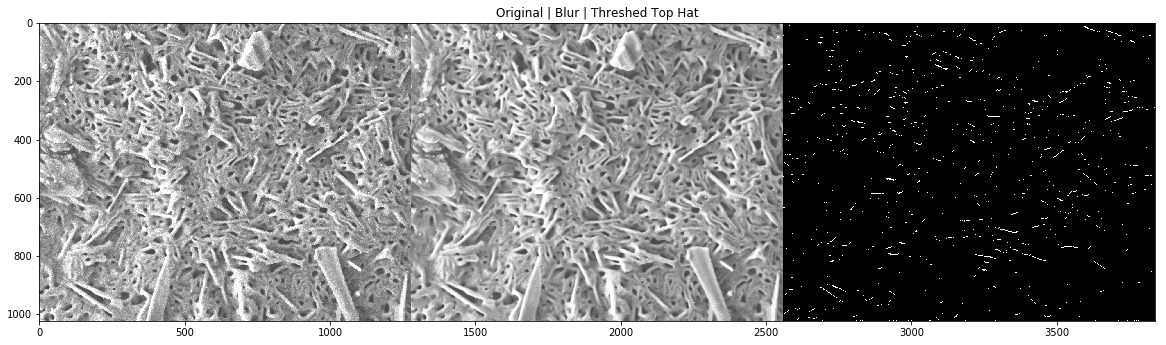

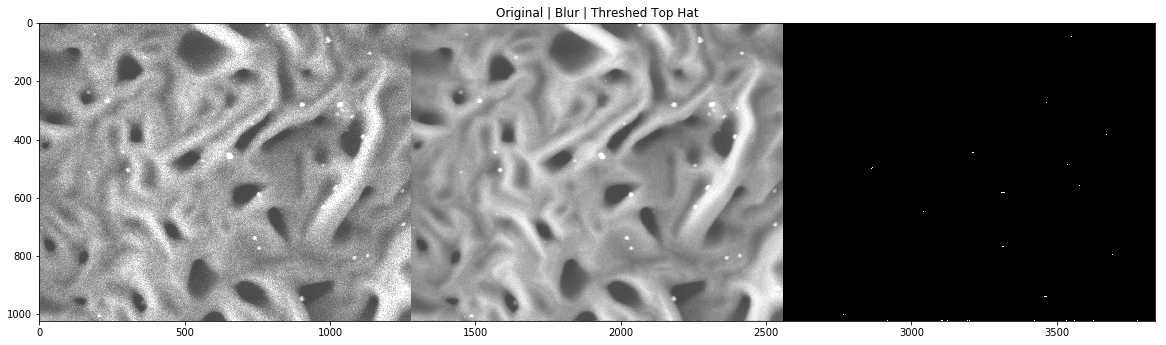

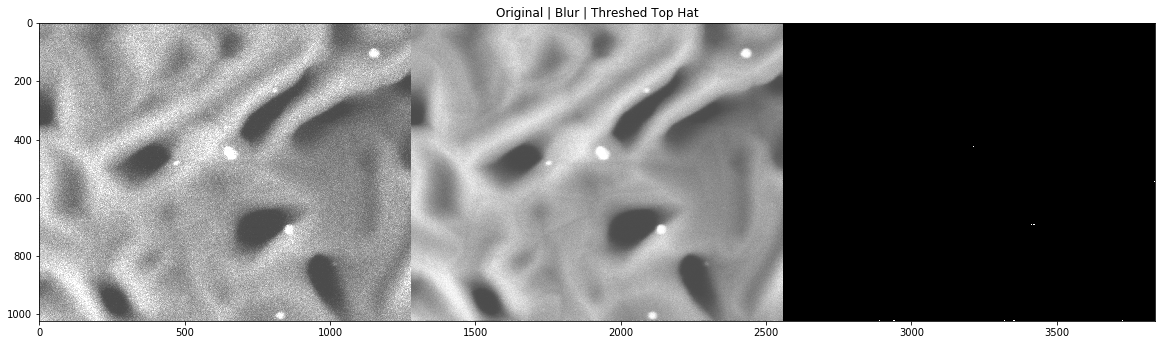

In [5]:
original = cv2.imread('data/cucumber/Imagem_031.tif', 0)
zoomed = cv2.imread('data/cucumber/Imagem_030.tif', 0)
doublezoomed = cv2.imread('data/cucumber/Imagem_029.tif', 0)
print('Counted particles in original:', count_particles(original, blurKernelLength = 3, tophatKernelLength = 7, thresh = 20))
print('Counted particles in zoom:', count_particles(zoomed, blurKernelLength = 3, tophatKernelLength = 7, thresh = 20))
print('Counted particles in zoom 2:', count_particles(doublezoomed, blurKernelLength = 3, tophatKernelLength = 7, thresh = 20))

### 3.4 Dragonfruit

Counted particles in original: 2083
Counted particles in zoom: 819
Counted particles in zoom 2: 177
Counted particles in zoom 3: 72


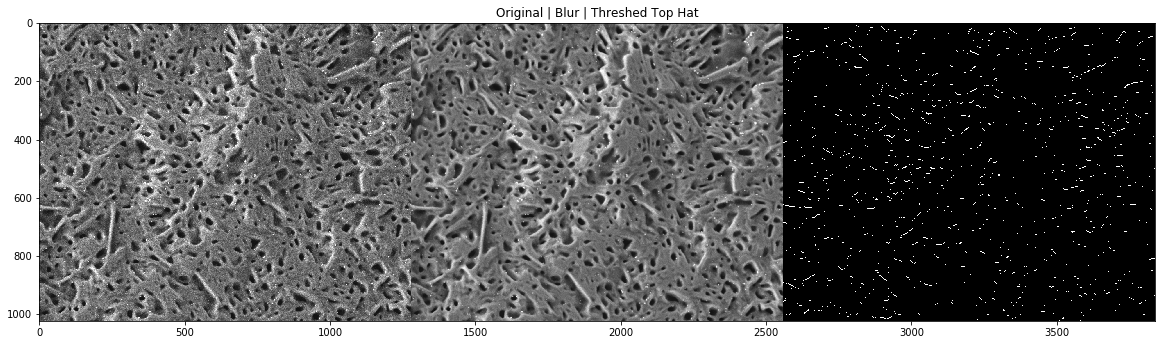

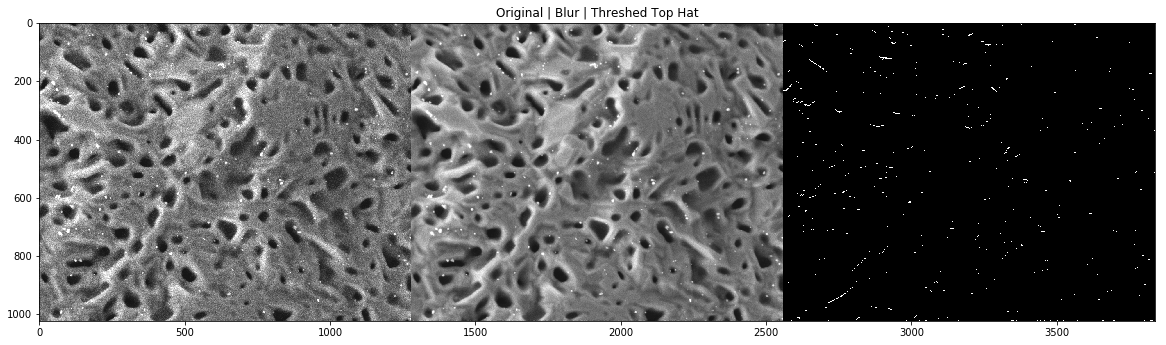

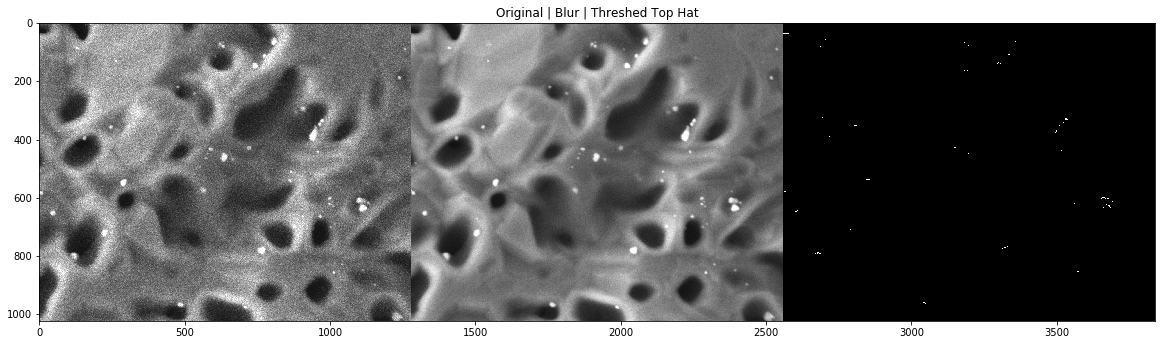

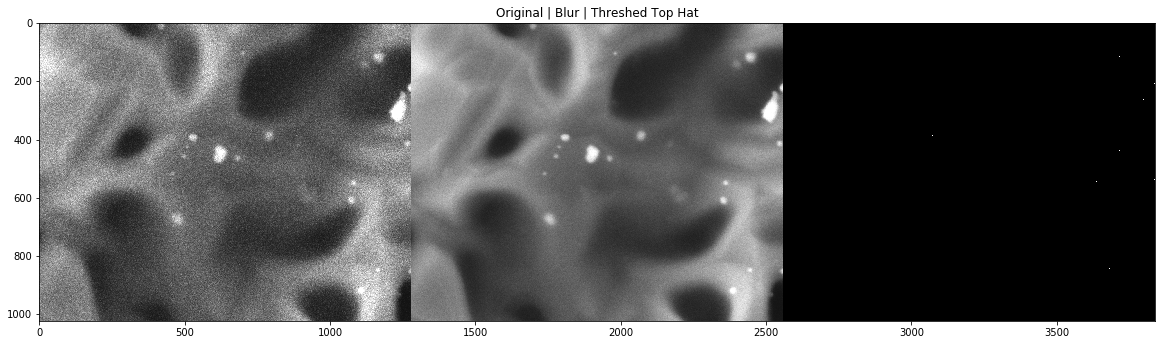

In [6]:
original = cv2.imread('data/dragonfruit/Imagem_007.tif', 0)
zoomed = cv2.imread('data/dragonfruit/Imagem_006.tif', 0)
doublezoomed = cv2.imread('data/dragonfruit/Imagem_005.tif', 0)
triplezoomed = cv2.imread('data/dragonfruit/Imagem_004.tif', 0)
print('Counted particles in original:', count_particles(original, blurKernelLength = 3, tophatKernelLength = 7, thresh = 20))
print('Counted particles in zoom:', count_particles(zoomed, blurKernelLength = 3, tophatKernelLength = 7, thresh = 20))
print('Counted particles in zoom 2:', count_particles(doublezoomed, blurKernelLength = 3, tophatKernelLength = 7, thresh = 20))
print('Counted particles in zoom 3:', count_particles(triplezoomed, blurKernelLength = 3, tophatKernelLength = 7, thresh = 20))

### 3.4 Elderberry

Counted particles in original: 4969
Counted particles in zoom: 1887
Counted particles in zoom 2: 379
Counted particles in zoom 3: 34


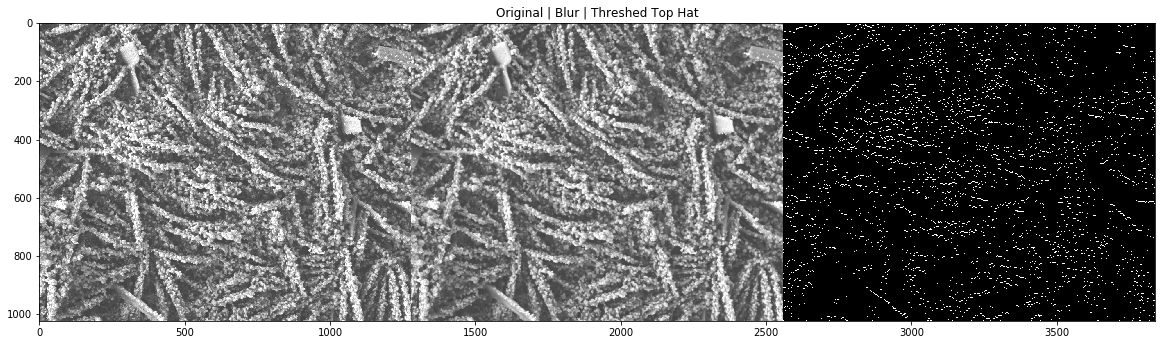

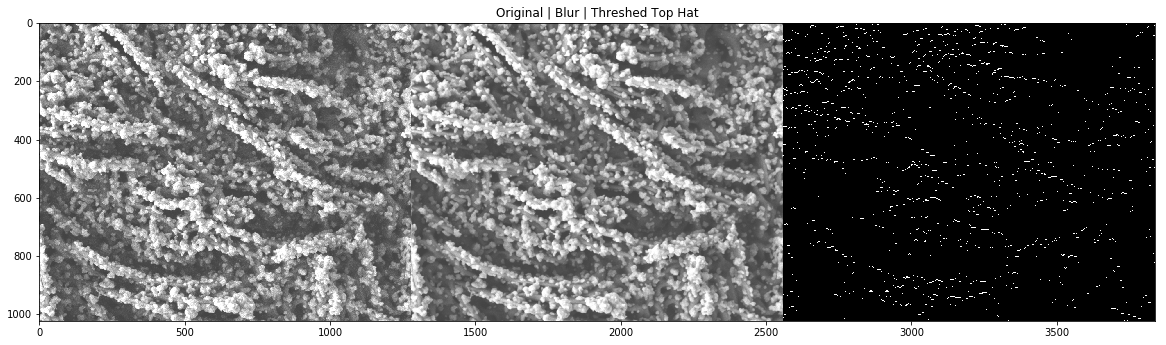

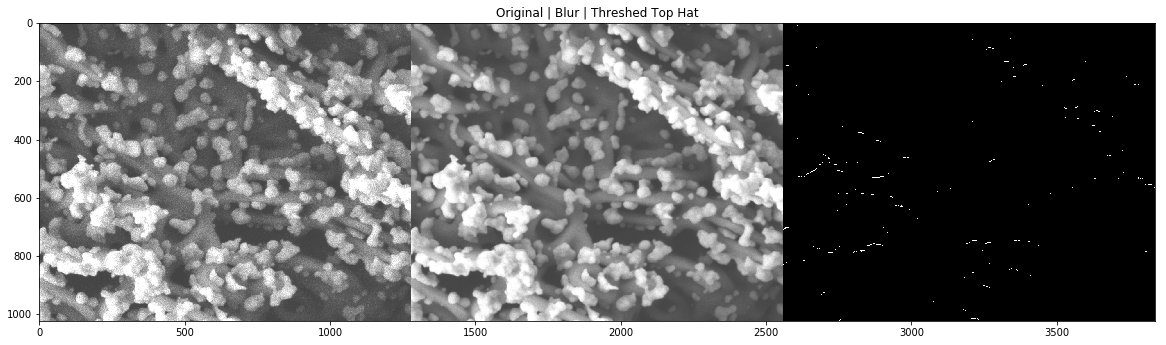

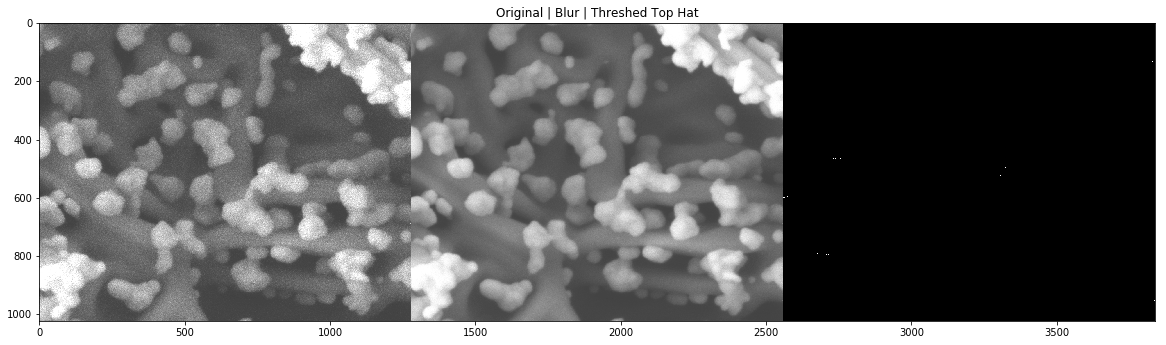

In [7]:
original = cv2.imread('data/elderberry/Imagem_026.tif', 0)
zoomed = cv2.imread('data/elderberry/Imagem_025.tif', 0)
doublezoomed = cv2.imread('data/elderberry/Imagem_024.tif', 0)
triplezoomed = cv2.imread('data/elderberry/Imagem_023.tif', 0)
print('Counted particles in original:', count_particles(original, blurKernelLength = 3, tophatKernelLength = 7, thresh = 20))
print('Counted particles in zoom:', count_particles(zoomed, blurKernelLength = 3, tophatKernelLength = 7, thresh = 20))
print('Counted particles in zoom 2:', count_particles(doublezoomed, blurKernelLength = 3, tophatKernelLength = 7, thresh = 20))
print('Counted particles in zoom 3:', count_particles(triplezoomed, blurKernelLength = 3, tophatKernelLength = 7, thresh = 20))

### 3.5 Fig

Counted particles in original: 330
Counted particles in zoom: 37
Counted particles in zoom 2: 0
Counted particles in zoom 3: 4


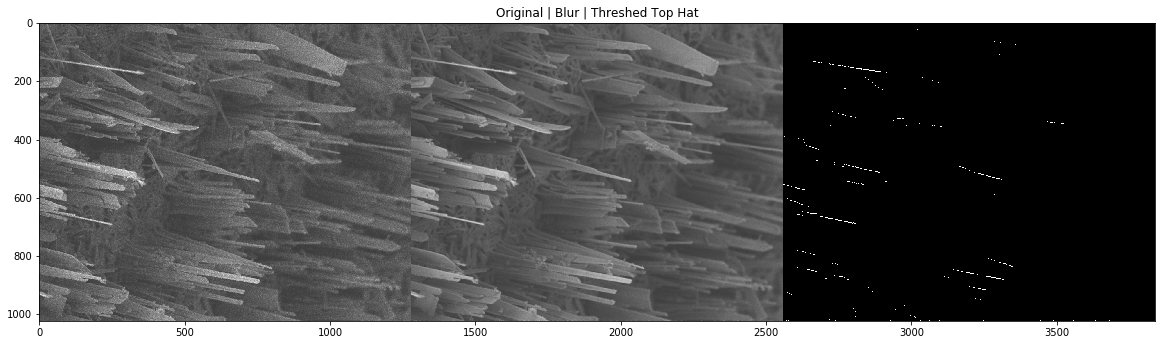

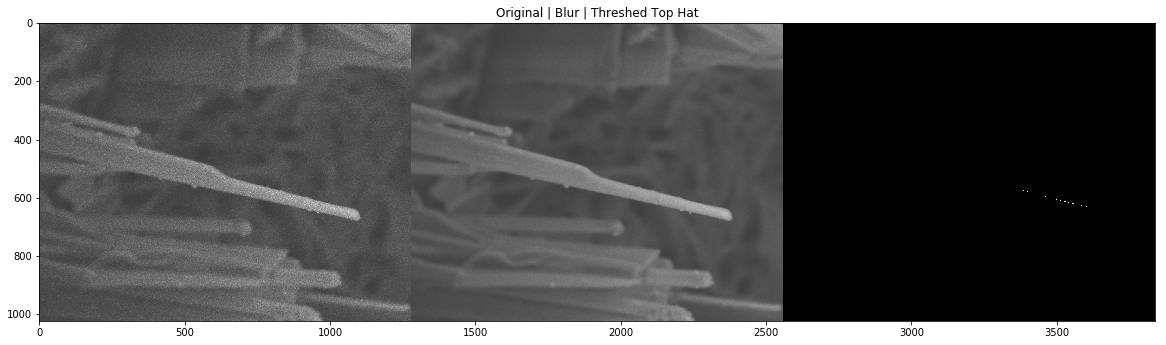

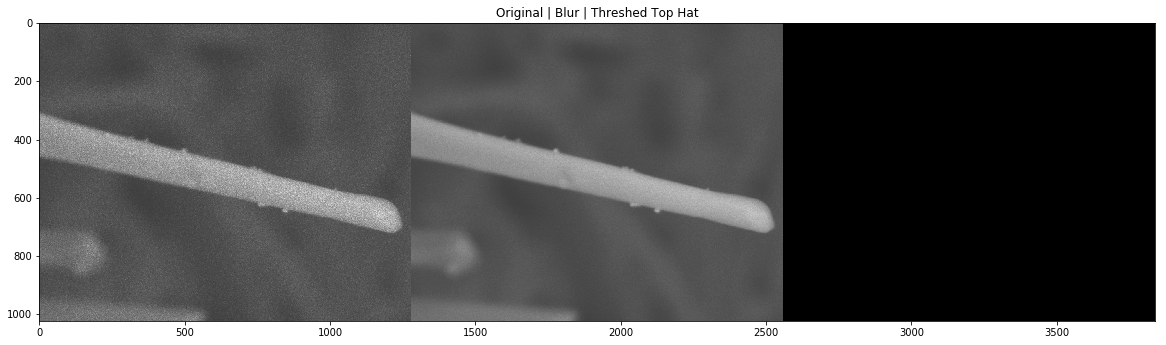

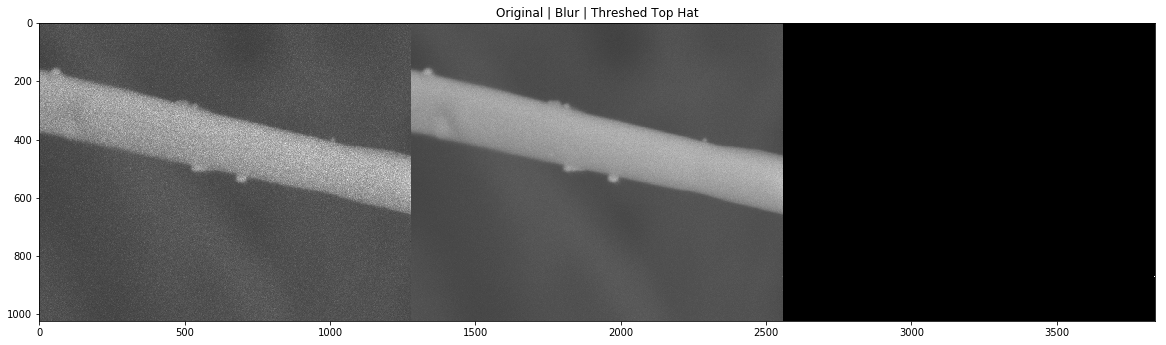

In [8]:
original = cv2.imread('data/fig/Imagem_024.tif', 0)
zoomed = cv2.imread('data/fig/Imagem_023.tif', 0)
doublezoomed = cv2.imread('data/fig/Imagem_022.tif', 0)
triplezoomed = cv2.imread('data/fig/Imagem_021.tif', 0)
print('Counted particles in original:', count_particles(original, blurKernelLength = 3, tophatKernelLength = 7, thresh = 20))
print('Counted particles in zoom:', count_particles(zoomed, blurKernelLength = 3, tophatKernelLength = 7, thresh = 20))
print('Counted particles in zoom 2:', count_particles(doublezoomed, blurKernelLength = 3, tophatKernelLength = 7, thresh = 20))
print('Counted particles in zoom 3:', count_particles(triplezoomed, blurKernelLength = 3, tophatKernelLength = 7, thresh = 20))

## 4. Conclusions

Through our experiments we can assume that the proposed function entitled count_particles, with the correct parameters, can be used for finding particles in images of microscopic structures. Given that we don't have access to the real number of particles we can't say that the resulting number of particles for each image is correct or not. There are also certain types of variances for each image that aren't being considered such as angle, illumination and time of exposure to the substance that generated the particles. The set of images used in 3.4 had more exposure time to the substance that generated the particles, and we can see clusters instead of dots of particles. In 3.5 there is an angle variance that made it difficult to identify some of the particles. We could also consider the original images without the particles, in the same settings, and compare them with the one full of particles but we don't have access to them as well.

There are many research questions that can be asked in regards to this project that would serve as future projects:
* **Data preparation / Meta data definition**
    * How can nanotech researchers better prepare images of microscopic structures for the automation of nanoparticle counting?
* **Upgrade of count_particles**
    * How can we use meta data from images of microscopic structures such as angle, zoom and illumination as inputs for automatic nanoparticle counting?
* **Machine learning / Statistics**
    * How can we tune a model that sets the parameters of count_particles through supervised learning?
    * How can we estimate the number of particles in a cluster of particles on images of microscopic structures?